<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Neural-Network/blob/master/Neural_Network_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Importing required Libraries 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# version of numpy library
print('version of numpy:',np.__version__)

version of numpy: 1.18.5


In [74]:
# version of matplotlib library
print('version of matplotlib:',matplotlib.__version__)

version of matplotlib: 3.2.2


In [75]:
# creating the input array
X = np.array([[1,0,1,0], [1,0,1,1], [0,1,0,1]])
print('\n input:')
print(X)
# shape of input array
print('\n shape of input:',X.shape)


 input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 shape of input: (3, 4)


In [76]:
# converting the input in matrix form
X= X.T
print('\n input in matrix form:')
print(X)


 input in matrix form:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]


In [77]:
# Creating the output array
y= np.array([[1],[1],[0]])
print('\n Actual output:')
print(y)

# output in matrix form
y= y.T

print('\n output in matrix form')
print(y)

# shape of output array
print('\n shape of output array:',y.shape)



 Actual output:
[[1]
 [1]
 [0]]

 output in matrix form
[[1 1 0]]

 shape of output array: (1, 3)


2 Architecture of the model (input, hidden and output neurons)

In [78]:
inputlayer_neurons= X.shape[0] # Number of future in dataset
hiddenlayer_neurons= 3 #number of hidden layer neurons
output_neurons= 1 # Number of neurons at output layer

3 Initializiang the weights for all the layer

In [80]:
# Initializing weights
# shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih = np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))

# shape of w_ho should number of nurons at hidden layer X number of neurons at output layer
w_ho = np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

In [81]:
# Shape of weight matrix
w_ih.shape, w_ho.shape

((4, 3), (3, 1))

Implement forword propogation

In [82]:
# we are using sigmoid as an activation function so defining the sigmoid function here 

# Defining the sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [83]:
# hidden layer activation
hidden_layer_input= np.dot(w_ih.T,X)
hiddenlayer_activations= sigmoid(hidden_layer_input)

In [84]:
# Calculating the output
output_layer_input= np.dot(w_ho.T,hiddenlayer_activations)
output= sigmoid(output_layer_input)

In [85]:
# output
output

array([[0.74014416, 0.76281469, 0.73737926]])

Impliment Backword propogation

In [86]:
# Calculating error
erron= np.square(y-output)/2

In [87]:
# rate of change of erron with respect to output
error_wrt_output= -(y-output)


In [88]:
# rate of change of output with respect to Z2
output_wrt_Z2= np.multiply(output,(1-output))

In [89]:
# rate of change of Z2 with respect to weight between hidden and output layer
Z2_wrt_who= hiddenlayer_activations

In [90]:
# Checking the shape of partial derivations
error_wrt_output.shape, output_wrt_Z2.shape,Z2_wrt_who.shape

((1, 3), (1, 3), (3, 3))

In [91]:
# Shape of weight of output lapyer
w_ho.shape

(3, 1)

In [92]:
# rate of change of error with respect to weight between hidden and output layer
error_wrt_who= np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)

In [93]:
error_wrt_who.shape

(3, 1)

In [94]:
# rate of change of error with respect to output
error_wrt_output= -(y-output)

In [95]:
# Rate of change of output with respect to Z2
output_wrt_Z2= np.multiply(output, (1-output))

In [96]:
# Rate of change of Z2 with respect to hidden layer activation
Z2_wrt_h1= w_ho

In [97]:
# Rate of change of hidden layer activation with respect to Z1
h1_wrt_Z1= np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))

In [98]:
# Rate of change of Z1 with respect to weight of input and hidden layer
Z1_wrt_wih = X

In [99]:
# Checking the shpe of partial derivation 
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape,Z1_wrt_wih.shape

((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

In [100]:
 # shape of weight of hidden layer
 w_ih.shape

(4, 3)

In [101]:
# rate of change of error with respect to weight between input and hidden layer
error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1 * np.dot(Z2_wrt_h1,(output_wrt_Z2 * error_wrt_output))).T)

In [102]:
error_wrt_wih.shape

(4, 3)

Update the parameters

In [103]:
# defining the learning rate
lr = 0.01

In [105]:
# initial w_ho and w_ih
w_ho

array([[0.91048588],
       [0.51051327],
       [0.05532917]])

In [106]:
w_ih

array([[0.22141886, 0.76487286, 0.37411787],
       [0.29305489, 0.55926951, 0.78235748],
       [0.64743924, 0.18108375, 0.37352656],
       [0.52070042, 0.28437608, 0.63548262]])

In [110]:
# updating the weight of output layer
w_ho = w_ho - lr * error_wrt_who

In [111]:
# updating the weigh of hidden layer
w_ih = w_ih - lr * error_wrt_wih

In [112]:
# updated w_ho and w_ih
w_ho

array([[0.90989828],
       [0.50990053],
       [0.05439473]])

In [113]:
w_ih

array([[0.2217331 , 0.76505234, 0.37413754],
       [0.2925016 , 0.55896289, 0.78233268],
       [0.64775349, 0.18126323, 0.37354624],
       [0.52027191, 0.28414614, 0.63546543]])

6 Training the model for n epochs

In [114]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of feature in dataset
hiddenlayer_neurons = 3 # Number of hidden layer in neurons
output_neurons = 1 # Number of neurons at output layer

In [115]:
# Initializing weight
w_ih = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
w_ho = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))

In [116]:
# Defining the parameter
lr = 0.01
epochs = 10000

In [117]:
# initial w_ih and w_ho
w_ih                                                                                  

array([[0.48552475, 0.75526569, 0.43942593],
       [0.49889505, 0.47418019, 0.9279238 ],
       [0.0269785 , 0.31966367, 0.77704151],
       [0.00945204, 0.62982847, 0.89315365]])

In [118]:
w_ho

array([[0.01510374],
       [0.19592794],
       [0.23040547]])

In [122]:
error_epoch = []
for i in range(epochs):
  # forwaard propogation

  # Hidden layer activation
  hidden_layer_input = np.dot(w_ih.T,X)
  hiddenlayer_activations = sigmoid(hidden_layer_input)

  # Calculating the output
  output_layer_input = np.dot(w_ho.T,hiddenlayer_activations)
  output = sigmoid(output_layer_input)

  # Backword propogation

  # Calculating error
  error = np.square(y-output)/2
  error_wrt_output = -(y-output)
  output_wrt_Z2 = np.multiply(output,(1-output))
  Z2_wrt_who = hiddenlayer_activations
  
  # rate of change of error with respect to weight between hidden and output layer
  error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output * output_wrt_Z2).T)
  Z2_wrt_h1 = w_ho
  h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
  Z1_wrt_wih = X

  # Rate of change of error with respect to weight between input and hidden layer
  error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1 * np.dot(Z2_wrt_h1,(error_wrt_output * output_wrt_Z2))).T)

  # Updating the weight betweeen hidden and output layer
  w_ho = w_ho - lr * error_wrt_who

  # updating the weight between input and hidden layer
  w_ih = w_ih - lr * error_wrt_wih

  # appending the error of each epoch
  error_epoch.append(np.average(error))




   

In [123]:
# updated w_ih and w_ho
w_ih

array([[ 0.63439049,  1.85427743,  0.30465705],
       [ 0.33129758, -1.73065725,  1.15145643],
       [ 0.17584424,  1.41867542,  0.64227262],
       [-0.08966245, -0.9349898 ,  1.0419061 ]])

In [124]:
w_ho

array([[-0.20599558],
       [ 3.41587467],
       [-1.42155044]])

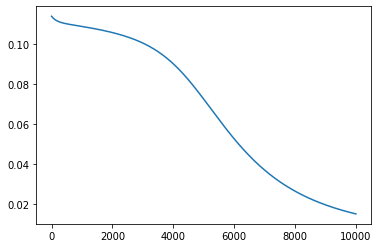

In [126]:
# Visualising the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))

In [130]:
# Final output from the model
output

array([[0.89323243, 0.84890825, 0.23649831]])

In [131]:
# actual target
y

array([[1, 1, 0]])

In [132]:
# error at last epoch
error

array([[0.00569966, 0.01141436, 0.02796572]])